Electric Vehicle Population Data Analysis
[Washington US]

Objective: To Analyze EV growth and distribution in Washington, US.

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through the Washington State Department of Licensing (DOL) as of February 28, 2023.

Source : Kaggle

Tool : Jupyter Notebook

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Reading CSV:-

df=pd.read_csv("C:\\Users\\hp\\Downloads\\Electric_Vehicle_Today_Data.csv")

In [3]:
#To get first 5 Records:-

df.head()

,Country,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,Sales
0,Suffolk,Suffolk,VA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,NaN,165060339
1,Yakima,Yakima,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,PACIFICORP,109719851
2,Yakima,Yakima,WA,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,PACIFICORP,131349110
3,Danville,Danville,VA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,NaN,124006297
4,Norfolk,Norfolk,VA,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,NaN,122947837


# Let's take a look at some information about the data:-

In [4]:
#To get the Rows & Columns:-

df.shape

(1999, 14)

1. Some missing data are observed

2. There are 14 columns among the data.

3. There are 1999 rows among the data .


In [5]:
# In this column we can check the column names present in the data set

df.columns

Index(['Country', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility', 'Sales'],
      dtype='object')

# In info function we can see the Non -Null values, Data Type ,Count

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            1999 non-null   object 
 1   City                                               1999 non-null   object 
 2   State                                              1999 non-null   object 
 3   Model Year                                         1999 non-null   int64  
 4   Make                                               1999 non-null   object 
 5   Model                                              1995 non-null   object 
 6   Electric Vehicle Type                              1999 non-null   object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  1999 non-null   object 
 8   Electric Range                                     1999 non-null   int64  
 9   Base MSR

In [7]:
#To get the Aggregrated Duplicated value present in the dataset:-

df.duplicated().sum()

0

In [8]:
#Dropping Duplicate Values:-

df.drop_duplicates(inplace=True)

# Unique() is used to check the unique values prensent in a column

In [9]:
df["Base MSRP"].unique()

array([     0,  45600,  31950,  39995,  33950,  69900,  52900, 110950,
        54950,  36900,  59900,  55700,  64950,  32250, 184400,  36800],
      dtype=int64)

In [10]:
df["City"].unique()

array(['Suffolk', 'Yakima', 'Danville', 'Norfolk', 'Olympia', 'Tenino',
       'Bothell', 'Seattle', 'Cle Elum', 'Snohomish', 'Leavenworth',
       'Kirkland', 'Port Orchard', 'Lake Stevens', 'Mount Vernon',
       'Decatur', 'Moses Lake', 'Anacortes', 'Pomeroy', 'Walla Walla',
       'Bow', 'Ronald', 'Pullman', 'Gig Harbor', 'Yelm', 'Poulsbo',
       'Tumwater', 'Langley', 'Selah', 'Goshen', 'Sedro Woolley',
       'Cashmere', 'Marysville', 'Woodinville', 'Wenatchee', 'Lacey',
       'Bremerton', 'Redmond', 'Lynnwood', 'Santa Cruz', 'Everett',
       'Edmonds', 'East Wenatchee', 'Mukilteo', 'Aiea', 'Spokane',
       'Clinton', 'Cheney', 'Chelan', 'Silverdale', 'Hunters',
       'Rock Island', 'Dayton', 'Union Gap', 'North Las Vegas', 'Palouse',
       'Colville', 'Renton', 'Bainbridge Island', 'Suquamish', 'Monroe',
       'Bellevue', 'Puyallup', 'South Hill', 'Des Moines', 'Tacoma',
       'Bellingham', 'Vancouver', 'Snoqualmie', 'Stanwood', 'Castle Rock',
       'Kenmore', 'White Sa

In [11]:
df["Sales"].unique()

array([165060339, 109719851, 131349110, ...,  94454368, 143091685,
        84420224], dtype=int64)

# Isna() used to check the null values
# Sum() shows the total number of null values present in a column

In [12]:
#To get Aggregrated null values available in data:-

df.isna().sum()

Country                                               0
City                                                  0
State                                                 0
Model Year                                            0
Make                                                  0
Model                                                 4
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                 13
DOL Vehicle ID                                        0
Electric Utility                                     18
Sales                                                 0
dtype: int64

# Now we Fill all the Null Values

In [13]:
df.Country.fillna(method="ffill",inplace=True)

In [14]:
df.Model.fillna(method="ffill",inplace=True)

In [15]:
df.City.fillna(method="ffill",inplace=True)

In [16]:
df["Legislative District"].fillna(method="ffill",inplace=True)

# Here we can see the data is clean but still we have two null values so we have to fill again the null values using median ,bfill

In [17]:
#To get Aggregrated null values available in data:-

df.isna().sum()

Country                                               0
City                                                  0
State                                                 0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  1
DOL Vehicle ID                                        0
Electric Utility                                     18
Sales                                                 0
dtype: int64

In [18]:
#To check how many unique values available in Legislative District column:-

df["Legislative District"].unique()

array([nan, 14., 22., 20.,  1., 43., 13., 12., 48., 26., 44., 10., 40.,
        9., 16., 23., 15., 39., 45., 35., 38., 21., 32., 46.,  2.,  3.,
        6.,  7., 11., 34., 37., 41., 36., 25., 33., 27., 49.,  5., 17.,
       30., 28.,  8., 31.,  4., 42., 47., 24., 18., 19., 29.])

In [19]:
#Here null value is present so we fill the null value by fillna() using mean/median():-

df["Legislative District"].fillna(df["Legislative District"].median(),inplace=True)

In [20]:
#To check how many unique values available in Legislative District column:-

df["Legislative District"].unique()

array([32.5, 14. , 22. , 20. ,  1. , 43. , 13. , 12. , 48. , 26. , 44. ,
       10. , 40. ,  9. , 16. , 23. , 15. , 39. , 45. , 35. , 38. , 21. ,
       32. , 46. ,  2. ,  3. ,  6. ,  7. , 11. , 34. , 37. , 41. , 36. ,
       25. , 33. , 27. , 49. ,  5. , 17. , 30. , 28. ,  8. , 31. ,  4. ,
       42. , 47. , 24. , 18. , 19. , 29. ])

In [21]:
#To get Aggregrated null values available in data:-

df.isna().sum()

Country                                               0
City                                                  0
State                                                 0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  0
DOL Vehicle ID                                        0
Electric Utility                                     18
Sales                                                 0
dtype: int64

In [22]:
#To check how many unique values available in Electric Utility column:-

df["Electric Utility"].unique()

array([nan, 'PACIFICORP', 'PUGET SOUND ENERGY INC',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUD NO 1 OF CHELAN COUNTY',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUD NO 2 OF GRANT COUNTY', 'AVISTA CORP',
       'PUD NO 1 OF DOUGLAS COUNTY', 'MODERN ELECTRIC WATER COMPANY',
       'CITY OF CHENEY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ELMHURST MUTUAL POWER & LIGHT CO|PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF KLICKITAT COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
    

In [23]:
#To fill null values by using fillna() in Electric Utility column:-

df["Electric Utility"].fillna(method="bfill",inplace=True)

# Now the data is clean
# No Null values present in a column

In [24]:
df.isna().sum()

Country                                              0
City                                                 0
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Electric Utility                                     0
Sales                                                0
dtype: int64

In [25]:
#To check how many unique values available in Electric Utility Column:-

df["Electric Utility"].unique()

array(['PACIFICORP', 'PUGET SOUND ENERGY INC',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUD NO 1 OF CHELAN COUNTY',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUD NO 2 OF GRANT COUNTY', 'AVISTA CORP',
       'PUD NO 1 OF DOUGLAS COUNTY', 'MODERN ELECTRIC WATER COMPANY',
       'CITY OF CHENEY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ELMHURST MUTUAL POWER & LIGHT CO|PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF KLICKITAT COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
       'B

In [26]:
df.dropna(inplace=True)

In [27]:
df.head()

,Country,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,Sales
0,Suffolk,Suffolk,VA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,32.5,476647986,PACIFICORP,165060339
1,Yakima,Yakima,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,PACIFICORP,109719851
2,Yakima,Yakima,WA,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,PACIFICORP,131349110
3,Danville,Danville,VA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,14.0,168513922,PUGET SOUND ENERGY INC,124006297
4,Norfolk,Norfolk,VA,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,14.0,150749378,PUGET SOUND ENERGY INC,122947837


In [28]:
#To clean csv file:-

df.to_csv("clean.csv")

# Data is Clean, Now we can do Visualization:-

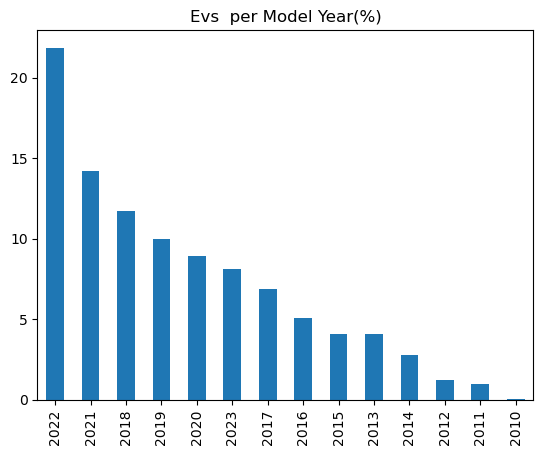

In [29]:
#Vizualization Evs per Model Year:-

plot = (100 * df['Model Year'].value_counts() / len(df['Model Year'])).plot(
kind='bar', title='Evs  per Model Year(%)')

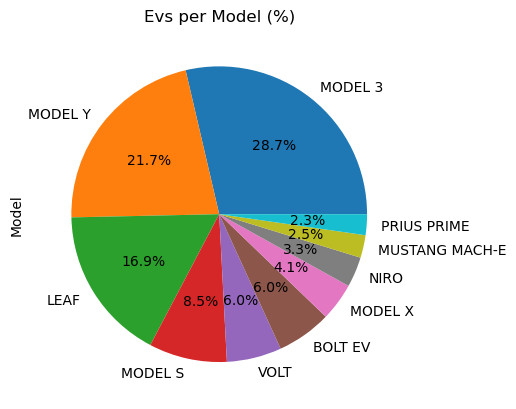

In [31]:
#To show graph in form of propertion we require pie chart:


#Evs per model % pie chart:-
plot = (100 * df['Model'].value_counts()[:10] / len(df['Model'])).plot(
kind='pie', autopct='%1.1f%%', title='Evs per Model (%)')

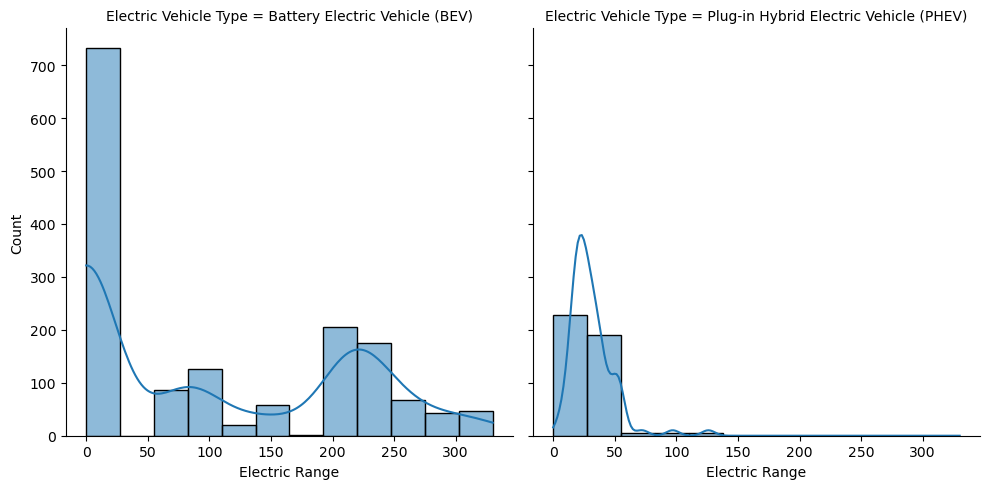

In [32]:
#dis plot(distribution plot) used to represent the data in histogram form:-
#kernel destiny estimation plot(kde)-better alternative to histogram 

sns.displot(data=df, x="Electric Range", col="Electric Vehicle Type" , kde=True)

<AxesSubplot:xlabel='Electric Range', ylabel='Base MSRP'>

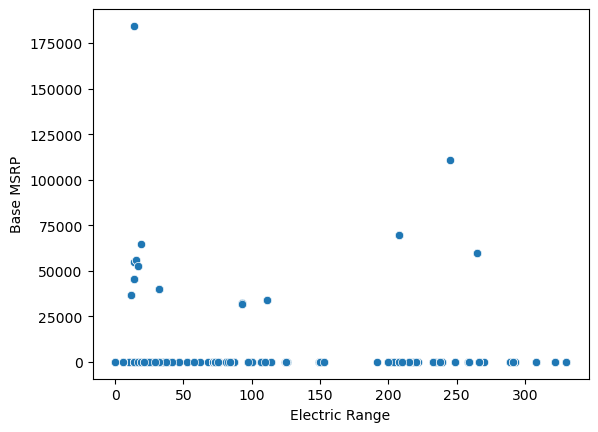

In [33]:
#Scatter Plot:- To check the relation between two variable graphically

sns.scatterplot(data=df, x="Electric Range", y="Base MSRP")

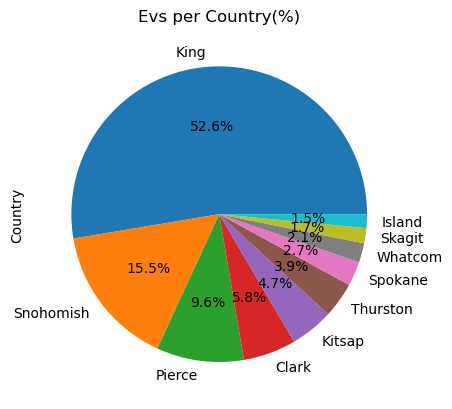

In [34]:
#autopct:- autopct string used to label the wedges with their numeric value

plot = (100 * df['Country'].value_counts()[:10] / len(df['Country'])).plot(
kind='pie', autopct='%1.1f%%', title='Evs per Country(%)')

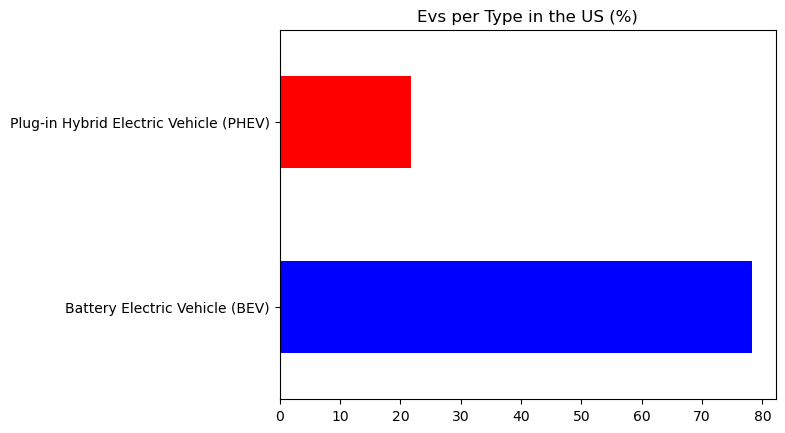

In [35]:
# HoriZontal Bar plot(barh):- It is useful to compare the data horizontally;

plot = (100 * df['Electric Vehicle Type'].value_counts()[:10] / len(df['Electric Vehicle Type'])).plot(
kind='barh', color=['blue', 'red'], title='Evs per Type in the US (%)')

# Applying Machine Learning

In [36]:
#df1=df.loc[:5000,:]

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Country', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Utility'],
      dtype='object')


In [40]:
#Label Encoding for object to numeric conversion

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 1998
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            1999 non-null   int32  
 1   City                                               1999 non-null   int32  
 2   State                                              1999 non-null   int32  
 3   Model Year                                         1999 non-null   int64  
 4   Make                                               1999 non-null   int32  
 5   Model                                              1999 non-null   int32  
 6   Electric Vehicle Type                              1999 non-null   int32  
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  1999 non-null   int32  
 8   Electric Range                                     1999 non-null   int64  
 9   Base MSR

In [41]:
#split data into input and target variables:-
 
X=df.drop("Sales",axis=1) 
y=df["Sales"]

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=51)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1599, 13)
(400, 13)
(1599,)
(400,)


In [44]:
#Performing Linear Regression:-

lr=LinearRegression()

In [45]:
#To fit line in Linear Regression:-
#fit()- used in machine Learning to build value

lr.fit(X_train,y_train)

LinearRegression()

In [46]:
#Predicted Value:-

pred=lr.predict(X_test)

In [47]:
#m value:-

lr.coef_

array([ 2.19198646e+05, -1.51279393e+04,  4.37928370e+05, -2.03992302e+05,
        3.57644631e+05, -9.08713665e+04,  1.82089837e+06, -6.24283937e+05,
       -1.07087749e+04, -3.75585152e+01,  1.11825142e+05,  1.93859948e-02,
       -8.77174213e+04])

In [48]:
#c value:-

lr.intercept_

500975339.7692141

In [49]:
#Printing Mean squared Error:-

print(mean_squared_error(pred,y_test))

3419821896095025.5


In [50]:
#Testing Accuracy:-

print(r2_score(pred,y_test))

-176.34114643063634


In [51]:
#Training Accuracy:-

lr.score(X_train,y_train)

0.005568418259682795